<a href="https://colab.research.google.com/github/gonzo1978/CAP4453/blob/main/3_image_filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Homework 3
1. Upload a personal image in hosting place that can be accesed using an URL.
2. Perform filtering using a 3x3 and then a 5x5 box filter. Show the resulting images. What is the effect of applying a box filter. Explain the differences between the two resulting images.


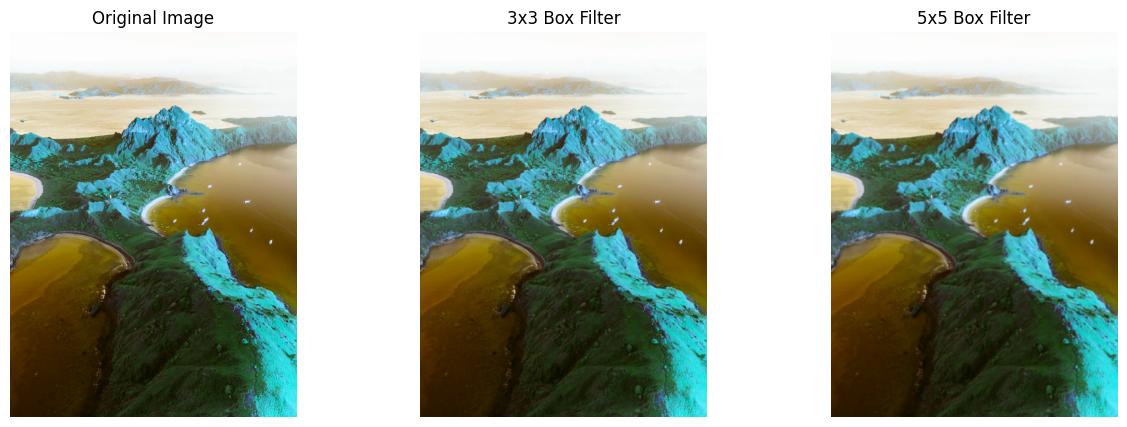

In [ ]:
from skimage import io
import cv2
import numpy as np
import matplotlib.pyplot as plt

yourUrl = 'https://images.unsplash.com/photo-1738432323553-b9471e2239b9?q=80&w=1032&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D'
image = io.imread(yourUrl)

# convert to BGR if you are using openCV
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Define the box filters
k1 = np.ones((3, 3), np.float32) / 9  # 3x3 filter
k2 = np.ones((5, 5), np.float32) / 25  # 5x5 filter

# Apply the filters
filtered_3x3 = cv2.filter2D(image, -1, k1)
filtered_5x5 = cv2.filter2D(image, -1, k2)

# Convert filtered images to RGB for visualization
filtered_3x3_rgb = cv2.cvtColor(filtered_3x3, cv2.COLOR_BGR2RGB)
filtered_5x5_rgb = cv2.cvtColor(filtered_5x5, cv2.COLOR_BGR2RGB)

# Display the results
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(image_rgb)
axes[0].set_title("Original Image")
axes[0].axis("off")

axes[1].imshow(filtered_3x3_rgb)
axes[1].set_title("3x3 Box Filter")
axes[1].axis("off")

axes[2].imshow(filtered_5x5_rgb)
axes[2].set_title("5x5 Box Filter")
axes[2].axis("off")

plt.show()

3. Obtain and print two-dimensional Gaussian kernels with the following characteristics:<br>
a) $\sigma^2 = 1$, kernel size: 3x3, <br>b) $\sigma^2 = 1.2$, kernel size: 5x5, <br> c) $\sigma^2 = 1.6$, kernel size: 9x9.





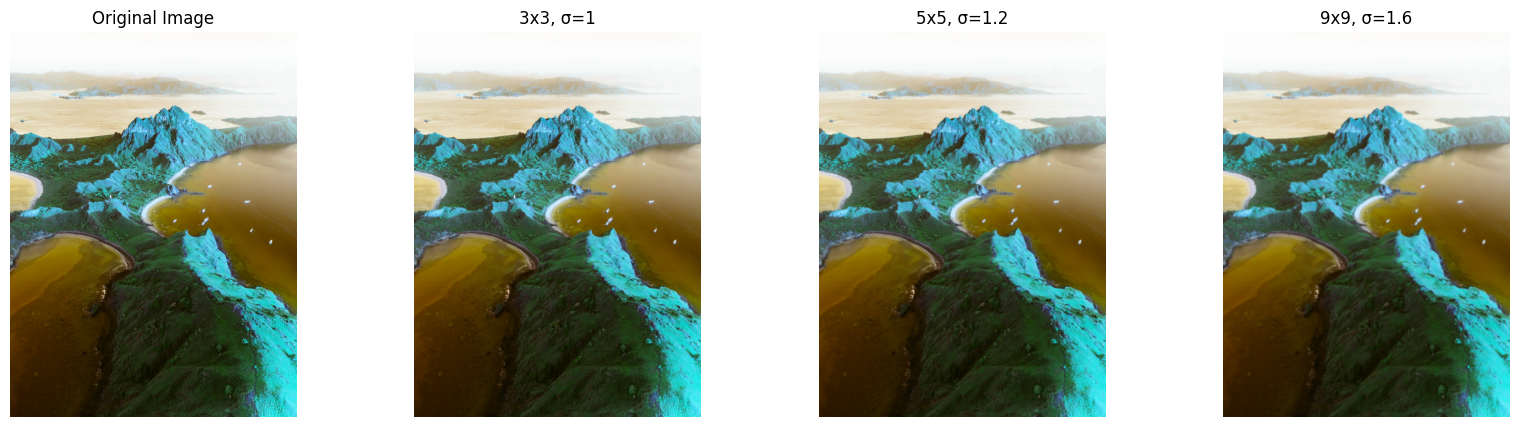

In [ ]:
#add your code here
import numpy as np
import cv2
import matplotlib.pyplot as plt

def gkern(l=5, sig=1.):
    """Creates Gaussian kernel with side length l and sigma sig"""
    ax = np.linspace(-(l - 1) / 2., (l - 1) / 2., l)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-0.5 * (np.square(xx) + np.square(yy)) / np.square(sig))
    return kernel / np.sum(kernel)  # Normalize to sum to 1

# Define parameters for Gaussian kernels
kernels = {
    "3x3, σ=1": gkern(3, 1),
    "5x5, σ=1.2": gkern(5, 1.2),
    "9x9, σ=1.6": gkern(9, 1.6)
}

# Apply Gaussian filtering using the computed kernels
filtered_images = {name: cv2.filter2D(image, -1, kernel) for name, kernel in kernels.items()}

# Convert images to RGB for visualization
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
filtered_images_rgb = {name: cv2.cvtColor(img, cv2.COLOR_BGR2RGB) for name, img in filtered_images.items()}

# Display the original and filtered images
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
axes[0].imshow(image_rgb)
axes[0].set_title("Original Image")
axes[0].axis("off")

for ax, (name, img) in zip(axes[1:], filtered_images_rgb.items()):
    ax.imshow(img)
    ax.set_title(name)
    ax.axis("off")

plt.show()


# A possible implementation is here. Modify it play with it:

# import numpy as np

# def gkern(l=5, sig=1.):
#    """\
#    creates gaussian kernel with side length l and a sigma of sig
#    """
#    ax = np.linspace(-(l - 1) / 2., (l - 1) / 2., l)
#    xx, yy = np.meshgrid(ax, ax)
#    kernel = np.exp(-0.5 * (np.square(xx) + np.square(yy)) / np.square(sig))
#    return kernel / np.sum(kernel)   #note that this normalize the filter to 1. is it desirable?.




4. Apply the three
Gaussian kernels obtained previously on your uploaded image. show your filter results. Discuss the differences of
Gaussian operations with different sigmas. Also, compare your results with question 2: what are the differences between these ﬁlters, what do you observe ? Which ﬁltering is the most eﬀective in which images ? Why ?

σ=1, Kernel Size: 3x3
- Applies a mild smoothing effect.
- Reduces minor noise while preserving fine details.
- Edges remain sharp, making it useful for slight noise reduction.

σ=1.2, Kernel Size: 5x5
- More noticeable blurring compared to 3x3.
- Further reduces noise but also starts softening edges slightly.
- Works well for moderate noise reduction.

σ=1.6, Kernel Size: 9x9
- Strong blurring effect.
- Fine details and sharp edges are softened significantly.
- Useful for heavy noise removal or artistic effects.


5. Implement the three steps of Sobel filtering. Apply it to the uploaded image for 3 different thresholds. Show the results on
the screen, and discuss the resulting images.



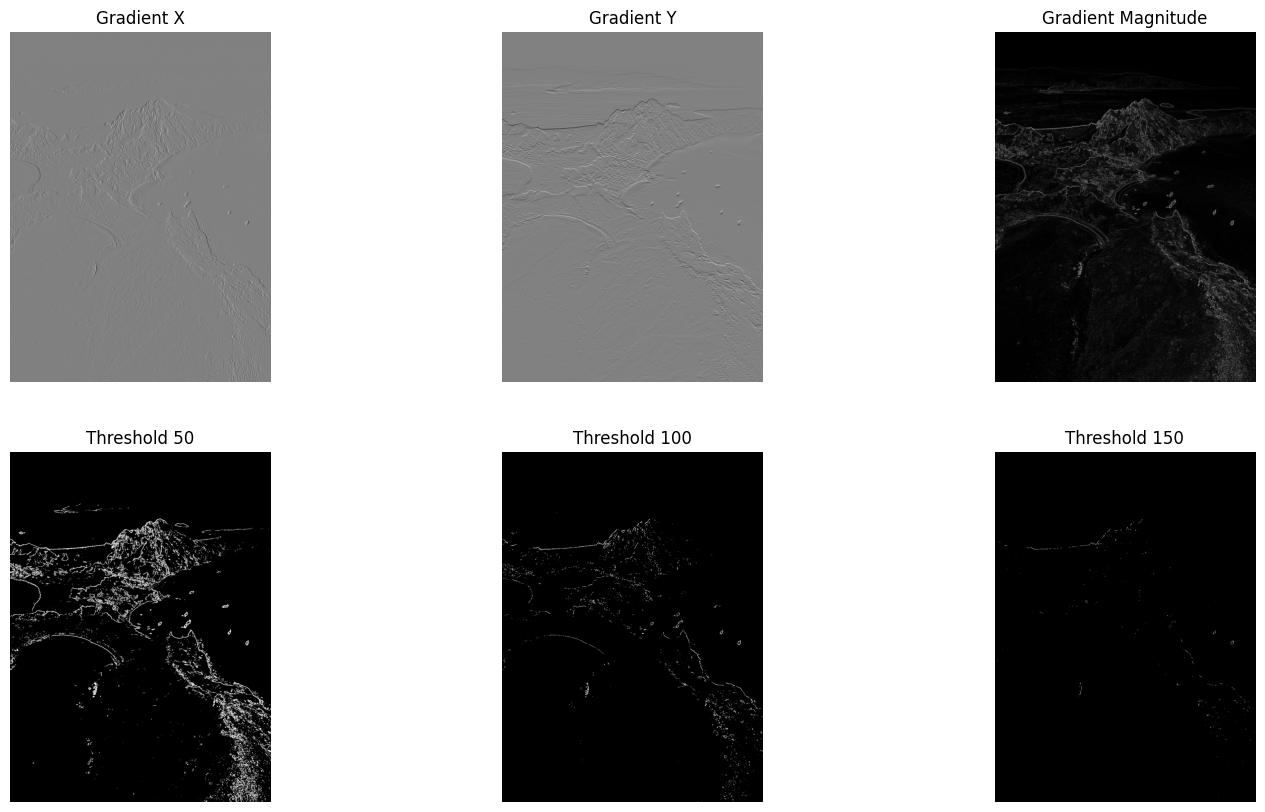

In [ ]:
# step 1. Get x and y gradients . Use the correct kernels
#cv2.filter2D()

# step 2. Compute the magnitude of the gradient

# Step 3. Threshold. Choose 3 different threshold. visualize outputs

import numpy as np
import cv2
import matplotlib.pyplot as plt

# Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Step 1: Compute X and Y gradients using Sobel kernels
sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=np.float32)
sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], dtype=np.float32)

grad_x = cv2.filter2D(gray_image, cv2.CV_64F, sobel_x)
grad_y = cv2.filter2D(gray_image, cv2.CV_64F, sobel_y)

# Step 2: Compute the magnitude of the gradient
gradient_magnitude = np.sqrt(np.square(grad_x) + np.square(grad_y))
gradient_magnitude = np.uint8(255 * gradient_magnitude / np.max(gradient_magnitude))  # Normalize

# Step 3: Apply thresholding with 3 different levels
thresholds = [50, 100, 150]
thresholded_images = {f"Threshold {t}": ((gradient_magnitude > t) * 255).astype(np.uint8) for t in thresholds}

# Convert images to grayscale for visualization
grad_x_gray = np.uint8(255 * (grad_x - np.min(grad_x)) / np.ptp(grad_x))
grad_y_gray = np.uint8(255 * (grad_y - np.min(grad_y)) / np.ptp(grad_y))

# Display results
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# First row: Gradients
axes[0, 0].imshow(grad_x_gray, cmap="gray")
axes[0, 0].set_title("Gradient X")
axes[0, 0].axis("off")

axes[0, 1].imshow(grad_y_gray, cmap="gray")
axes[0, 1].set_title("Gradient Y")
axes[0, 1].axis("off")

axes[0, 2].imshow(gradient_magnitude, cmap="gray")
axes[0, 2].set_title("Gradient Magnitude")
axes[0, 2].axis("off")

# Second row: Thresholded outputs
for ax, (name, img) in zip(axes[1], thresholded_images.items()):
    ax.imshow(img, cmap="gray")
    ax.set_title(name)
    ax.axis("off")

plt.show()


- Lower thresholds show more edges but may include noise.
- Higher thresholds reduce noise but may miss finer details.
- Sobel filtering is useful for edge detection, but it does not smooth images like Gaussian filtering.


6. Use canny edge detector incorporated in opencv. Pick two diferent sets of hysteresys thresholds. What can you tell about the effect on the obtained edges.  


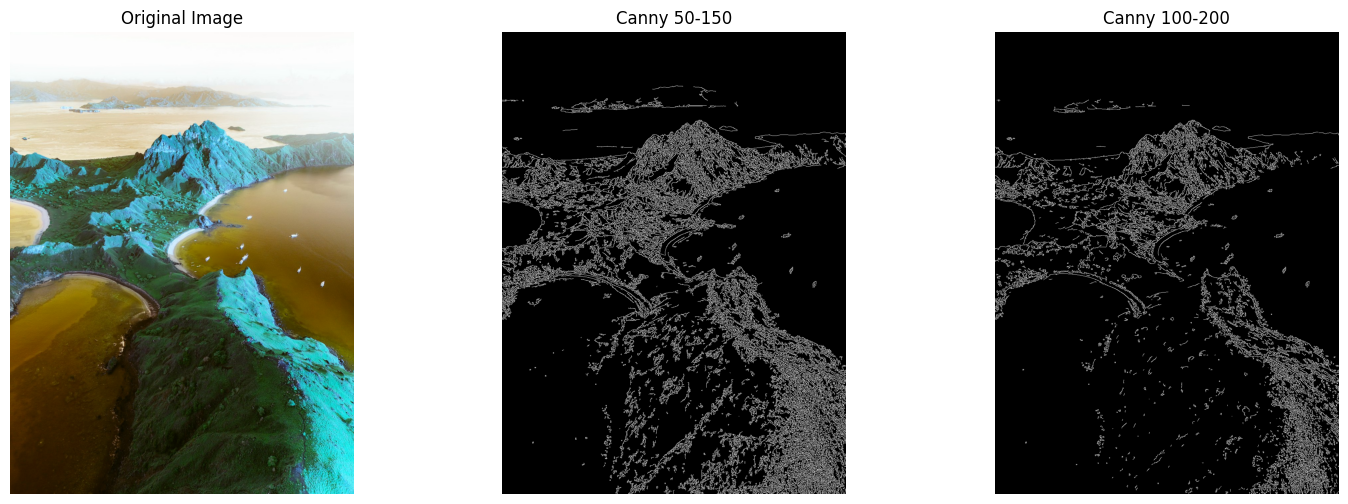

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Convert to grayscale (Canny requires a single-channel image)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Define two sets of hysteresis thresholds for Canny edge detection
threshold_sets = [(50, 150), (100, 200)]

# Apply Canny edge detection with different threshold sets
canny_edges = {
    f"Canny {t1}-{t2}": cv2.Canny(gray_image, t1, t2) for t1, t2 in threshold_sets
}

# Display results
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Show original image
axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0].set_title("Original Image")
axes[0].axis("off")

# Show Canny edge detection results
for ax, (name, img) in zip(axes[1:], canny_edges.items()):
    ax.imshow(img, cmap="gray")
    ax.set_title(name)
    ax.axis("off")

plt.show()



- Use low thresholds for fine details in low-contrast images.
- Use high thresholds for clear edges in well-lit, high-contrast images.

Now, you are going to use morphological operations to try to count automatically the number of rice grains from an image.

7. Read image, convert it to gray scale and apply a bilateral filter.
<br>A bilateral filter is a filter that smooth where there is not changes on the gray scale preserving values close to edges. To understand bilateral filters  [Click here](https://machinelearningknowledge.ai/bilateral-filtering-in-python-opencv-with-cv2-bilateralfilter/)


Downloading...
From: https://drive.google.com/uc?id=18k93ipxDHsVUjOFWDYNLHyj8GiEZJgY2
To: /content/image.jpg
100%|██████████| 21.3k/21.3k [00:00<00:00, 36.5MB/s]


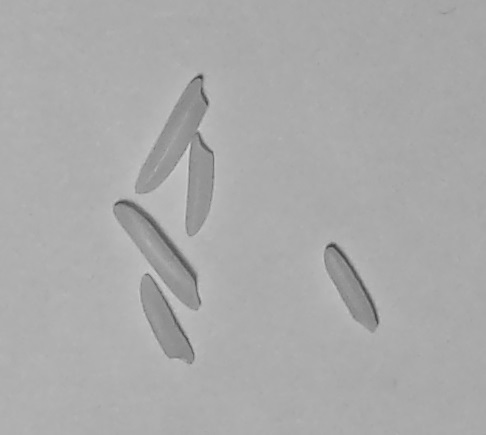

In [8]:
import gdown
import cv2
from google.colab.patches import cv2_imshow

# Corrected URL for direct download access
url = 'https://drive.google.com/uc?id=18k93ipxDHsVUjOFWDYNLHyj8GiEZJgY2'

# Output filename
output = 'image.jpg'

# Download the file from the Google Drive link
gdown.download(url, output, quiet=False)

# Read the image using OpenCV
img = cv2.imread(output)

if img is not None:
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Display the image
    cv2_imshow(gray)

    # Optionally, apply filters or further processing here
else:
    print("Failed to load the image. Please check the file path and the file format.")


8. Compute the edges of the previous image with a Canny filter. Adjust the thresholds of the canny filter to obtain the best edge you can.

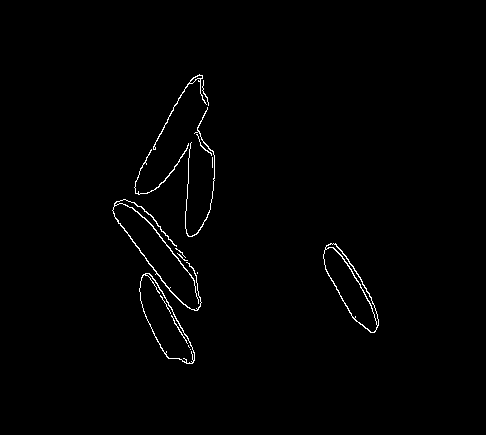

In [9]:
# use the canny from openCV
threshold1 = 50
threshold2 = 150
edges = cv2.Canny(	gray, threshold1, threshold2)
cv2_imshow(edges)


9. Apply a closing operation to the edges of the image. Experiment with different kernel sizes (3,5,9).


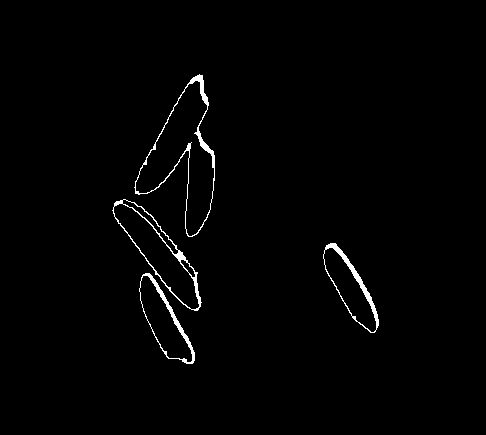

In [10]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
closed = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)
cv2_imshow(closed)

10. Find the countours (curve joining all the continuous points (along the boundary)) of the object, display the grains you found in the image. Explanation of contours is [here](https://docs.opencv.org/3.4/d4/d73/tutorial_py_contours_begin.html).
<br>a) what the values of the variable (array) cnts represents?
<br>**Answer:** The variable cnts represents a list of all contours found in the image, where each contour is an array of (x, y) coordinates outlining the boundary of an object.  <br>b) What the variable "peri" represents? <br>**Answer:** The variable peri represents the perimeter (arc length) of a contour, calculated to help in approximating the shape of the contour. <br>c) Change the color of the contour to red

A total of 4 grains were found
1


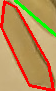

2


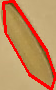

3


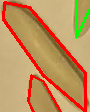

4


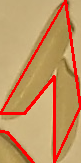

the grains


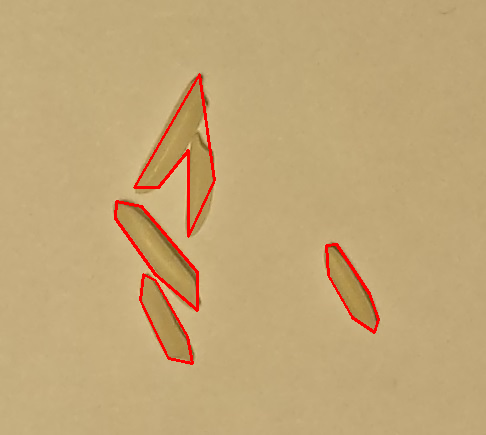

In [12]:
i=0
cnts,heir= cv2.findContours(closed.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)[-2:]


print("A total of " + str(len(cnts)) + " grains were found")
for c in cnts:
	peri = cv2.arcLength(c, True)

  #an approximation of the contour of the figure
	approx = cv2.approxPolyDP(c, 0.02 * peri, True)

	# Understand what are the parameters of this function
	cv2.drawContours(img, [approx], -1, (0, 0, 255), 2) # RED Contour added

  # crop the image
	x,y,w,h =cv2.boundingRect(c)
	i=i+1;
	print(i)
	newImage=img[y:y+h,x:x+w]
	cv2_imshow(newImage)

print("the grains")
cv2_imshow(img)
